In [7]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
file_name = 'tcross_spectrum_neutron.out'
df = pd.read_csv(file_name, delim_whitespace=True, skiprows=94, nrows=(393-94), names=['e-lower', 'e-upper', 'fn', 'en'], )

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9084\582687559.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_name, delim_whitespace=True, skiprows=94, nrows=(393-94), names=['e-lower', 'e-upper', 'fn', 'en'], )


In [9]:
df

,e-lower,e-upper,fn,en
0,0.001035,0.001071,0.00000,0.0
1,0.001071,0.001109,0.00000,0.0
2,0.001109,0.001147,0.00000,0.0
3,0.001147,0.001187,0.00000,0.0
4,0.001187,0.001229,0.00002,1.0
...,...,...,...,...
294,25.264000,26.147000,0.00000,0.0
295,26.147000,27.061000,0.00000,0.0
296,27.061000,28.007000,0.00000,0.0
297,28.007000,28.987000,0.00000,0.0


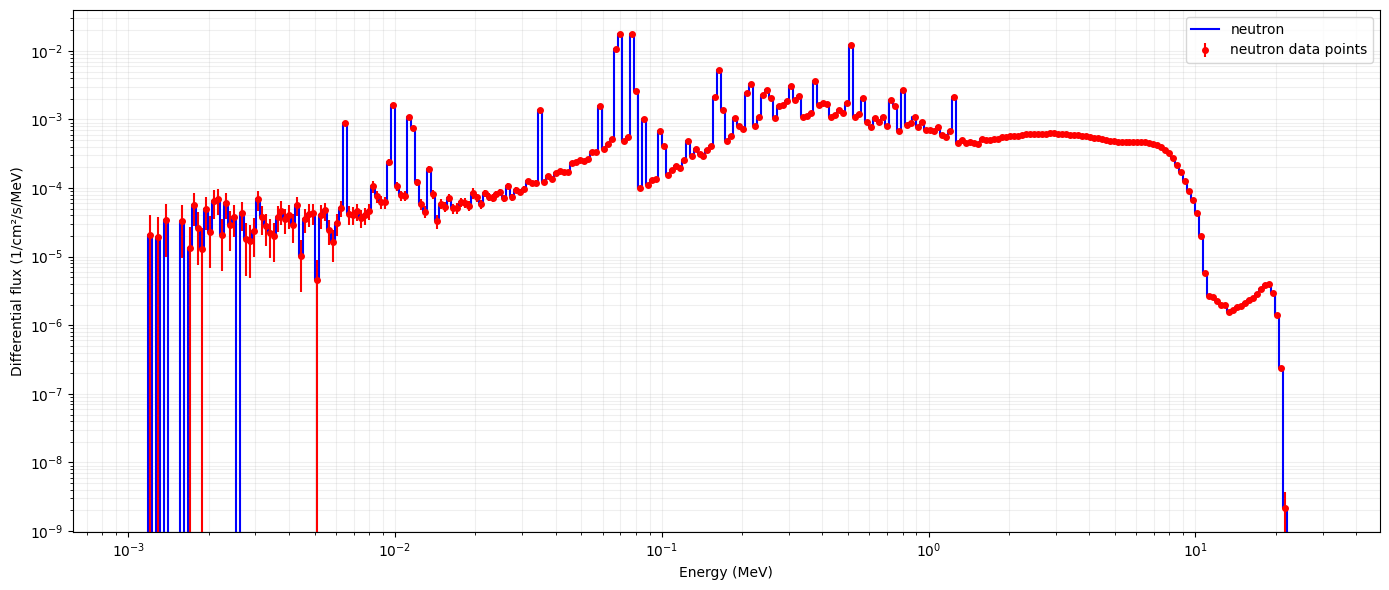

In [ ]:
fig, ax = plt.subplots( 1, 1, figsize=(14,6) )

ax.set_xlabel( 'Energy (MeV)' )
ax.set_ylabel( 'Differential fluence (1/cm²/MeV)' )

ax.set_xscale('log')
ax.set_yscale('log')

ax.step( df['e-lower'], df['fn'], where='post', label='neutron', color='blue' )
ax.errorbar(
    0.5 * (df['e-lower'] + df['e-upper']),
    df['fn'],
    yerr=df['fn']*df['en'],
    fmt='o',
    color='red',
    markersize=4,
    label='neutron data points'
)
ax.legend()
ax.grid(True, which='both', alpha=0.2)
plt.tight_layout()
plt.show()

\begin{align}

N & = A_{0} \cdot \int_{0}^{\infty} f(E) dE \\ 
& = A_{0} \sum^{bins} f_{i} \Delta_{i} \\
\\
E & = A_{0} \cdot \int_{0}^{\infty} E \cdot f(E) dE \\
& = A_{0} \cdot \sum^{bins} \int_{E_{i-1}}^{E_{i}} E f_{i} dE \\
& = A_{0} \cdot \sum^{bins} f_{i} \int_{E_{i-1}}^{E_{i}} E dE \\
& = A_{0} \cdot \sum^{bins} f_{i} \frac{1}{2} \left( E_{i}^{2} - E_{i-1}^{2} \right)
\end{align}

In [11]:
# integrate PDF

R = 1.
area_tally = 4.*np.pi*R*R
print( f"Radius used in the simulation: {R} cm (area = {4.*np.pi*R*R})" )

dx = df['e-upper'] - df['e-lower']
N_cross = area_tally * np.sum( df['fn'] * dx )
print( f"Area under the curve, number of neutrons per source: {N_cross}" )


Radius used in the simulation: 1.0 cm (area = 12.566370614359172)
Area under the curve, number of neutrons per source: 0.06957045988228994


In [12]:

E = area_tally * np.sum( df['fn'] * 0.5 * (df['e-upper'] + df['e-lower']) * dx )
print(f"Total energy: {E}")

loss = (14.1 - E)/14.1 * 100.
print( f"Energy loss: {loss} %" )

Total energy: 0.24469765479233485
Energy loss: 98.26455563977068 %
